In [1]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np

In [2]:
band8 = rasterio.open('b8.img')             # Near Infrared Band
band11 = rasterio.open('b11.img')           # SWIR Band

In [3]:
nir = band8.read(1).astype('float64')
swir = band11.read(1).astype('float64')

In [4]:
ndwi = np.where((nir+swir) == 0., 0, (nir - swir) / (nir + swir))
ndwiImage = rasterio.open('ndwiImage1.tiff', 'w', driver='Gtiff',
                          width=band8.width,
                          height=band8.height,
                          count=1, crs=band8.crs,
                          transform=band8.transform,
                          dtype='float64')
ndwiImage.write(ndwi, 1)
ndwiImage.close()

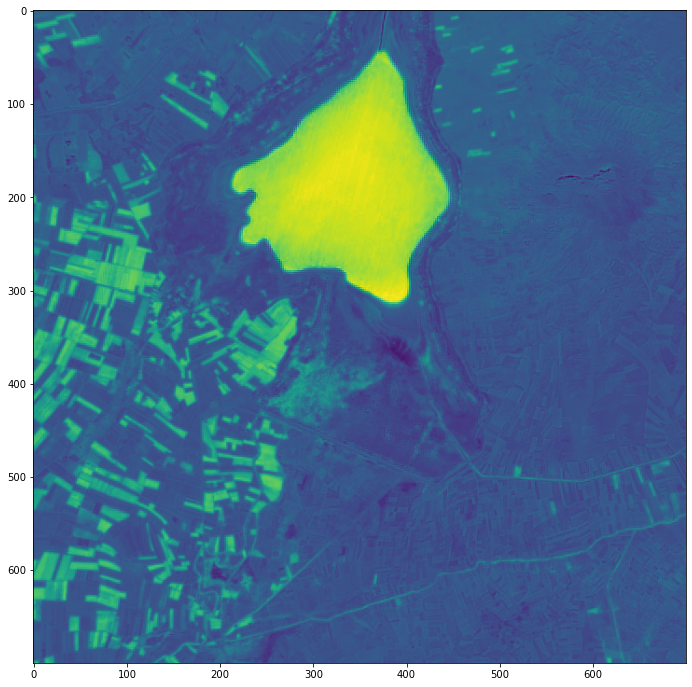

In [5]:
ndvi = rasterio.open('ndwiImage1.tiff')
fig = plt.figure(figsize=(18, 12))
plot.show(ndwi)